# *Coding Challenge Data Science*
Autorin: Eva-Maria Weiss

# Setup

### Installation 
Installation der nicht vorinstallierten Bibliotheken

In [1]:
!pip install arff 
!pip install statsmodels
!pip install seaborn
!pip3 install -U scikit-learn scipy matplotlib



In [2]:
!pip install imbalanced-learn

In [3]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Importieren der Bibliotheken

Für diese Challenge benutze ich folgende Libraries:
- `arff` für den Datenimport
- `pandas` für das Datenbank-Managing
- `numpy` für mathematische Operationen
- `sklearn` für machine learning 
- `seaborn` zum Visualisieren der Daten
- `matplotlib` zusätzliche Plotting-Tools (zum Beispiel Subplots)
- `stats` für statistische Tests, z.B. Welch Test

In [4]:
import statsmodels.api as sm
import arff  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [5]:
import statsmodels.discrete.count_model as reg_models

# Aufgabe 1: Explorative Datenanalyse

##  Importieren der Datensätze
*nach Anleitung*

In [6]:
data_freq = arff.load('freMTPL2freq.arff') 
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower", 
"VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"]) 
data_sev = arff.load('freMTPL2sev.arff') 
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"]) 


# Aufgabe 1: Datenextraktion (EDA)

## Vertrautmachen mit den Datensätzen

In [7]:
df_freq.head(5)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'


gibt es 'Null' oder NaN information? <font color='red'>    Nein </font>

In [8]:
df_sev.head()

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00


In [9]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


In [10]:
df_freq.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


<font color='red'> Auffälligkeit1: </font> <span style="background:yellow">Kein Schadensaufwand bei dem größeren Teil (siehe  ClaimNb 75% Quartil) der Versicherten: ein überwiegender Teil der Antworktvariable mit dem Wert  0</span>

<font color='red'> Auffälligkeit2: </font> <span style="background:yellow">die abhängige Variable /Antwortvariable muss aus beiden Datensätzen generiert werden</span>



### Anbängige Variable in den Datensatz implementieren

Die abhängige Variable definiert als *ClaimAmount* / *Exposure*

1. *Exposure* aus df_freq

2. *ClaimAmount* aus df_sev:
    a) groupby von IDpol, da es möglicherweise mehrere Einträge pro Vertrag gibt
    b) Series in eine Datenbank formatieren
    

In [11]:
# Exp = df_freq["Exposure"]

# uniqueID_sev = df_sev['IDpol'].unique()
# print(len(uniqueID_sev))

Amount = df_sev.groupby(['IDpol'])['ClaimAmount'].sum()
# Aus der Series ein df machen, mit automatischen index beginnend bei 0
Y = Amount.reset_index()
Y.columns = ['IDpol', 'ClaimAmount']
Y

,IDpol,ClaimAmount
0,139.0,303.00
1,190.0,1981.84
2,414.0,1456.55
3,424.0,10834.00
4,463.0,3986.67
...,...,...
24945,6113521.0,1324.40
24946,6113793.0,1769.88
24947,6113817.0,1288.28
24948,6113834.0,12230.40


In [12]:
df_freq['ClaimAmount'] = 0
df_freq['ClaimAmount_Exp'] = 0
df_freq['ClaimAmount'] = df_freq['ClaimAmount'].astype(float)
df_freq['ClaimAmount_Exp'] = df_freq['ClaimAmount_Exp'].astype(float)
df_freq.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimAmount_Exp
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',0.0,0.0
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',0.0,0.0
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22',0.0,0.0
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',0.0,0.0
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',0.0,0.0


In [13]:
# fülle ClaimAmount mit den Daten aus Y      
claim_amount_map = Y.set_index('IDpol')['ClaimAmount']
print(claim_amount_map)
df_freq['ClaimAmount'] = df_freq['IDpol'].map(claim_amount_map).fillna(0)
df_freq.describe()

IDpol
139.0          303.00
190.0         1981.84
414.0         1456.55
424.0        10834.00
463.0         3986.67
               ...   
6113521.0     1324.40
6113793.0     1769.88
6113817.0     1288.28
6113834.0    12230.40
6113971.0     1452.00
Name: ClaimAmount, Length: 24950, dtype: float64


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,ClaimAmount_Exp
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05,678013.0
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,8.835998e+01,0.0
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,5.822454e+03,0.0
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.0
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,0.0
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.0
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00,0.0
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06,0.0


In [14]:
df_freq['ClaimAmount_Exp'] = df_freq['ClaimAmount'] / df_freq['Exposure']
df_freq.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,ClaimAmount_Exp
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,6.780130e+05,6.780130e+05
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,8.835998e+01,3.832608e+02
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,5.822454e+03,3.682070e+04
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000e+00,0.000000e+00
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000e+00,0.000000e+00
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000e+00,0.000000e+00
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000e+00,0.000000e+00
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,4.075401e+06,1.852455e+07


# Prüfe abhängige Variable (Schadenfallkosten gegenüber Versicherungsdauer)

<Axes: xlabel='Exposure', ylabel='ClaimAmount'>

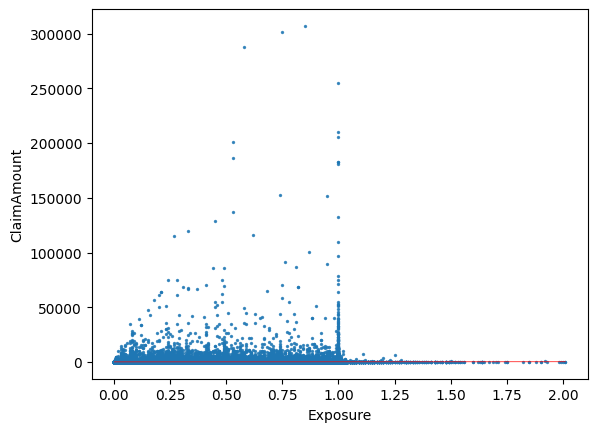

In [15]:
df_cl = df_freq[df_freq["ClaimAmount_Exp"] < 500000]
sns.regplot(x="Exposure", y="ClaimAmount", data=df_cl, line_kws={"color": "red",'lw': 0.5}, scatter_kws={'s':2})


<Axes: xlabel='Exposure', ylabel='ClaimAmount'>

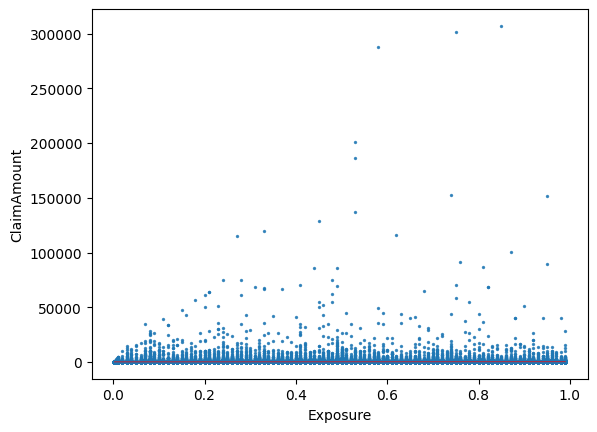

In [16]:
# Datensatz eingegrenzt auf Exposure < 1
df_cl = df_cl[df_cl["Exposure"] < 1]

# df_noNulls = df_noNulls[df_noNulls["VehAge"] <30]
# df_noNulls = df_noNulls[df_noNulls["DrivAge"] <80]
# #exclude "outliers" that might bias the data set
# df_noNulls = df_noNulls[df_noNulls["ClaimAmount_Exp"] < 50000]
# #verkleiner den Datensatz
# df_noNulls_cl = df_noNulls[["ClaimAmount_Exp",'DrivAge','VehPower','VehAge', 'BonusMalus', 'Density']]
# df_noNulls_cl.describe()
sns.regplot(x="Exposure", y="ClaimAmount", data=df_cl, line_kws={"color": "red",'lw': 0.5}, scatter_kws={'s':2})

## Überprüfe Korrelation zwischen Eingabevariablen und Ausgabevariablen

Attribute identifizieren, die die Schadensaufwendungen am meisten beeinflussen

In [17]:
AnzahlNull = df_freq['ClaimAmount_Exp']
AnzahlNull.replace(0, np.nan, inplace=True)
AnzahlNullN =AnzahlNull.isnull().sum(axis=0)
AnzahlNotNull = len(df_freq)-AnzahlNullN

print(AnzahlNullN, AnzahlNotNull)

653069 24944


<BarContainer object of 2 artists>

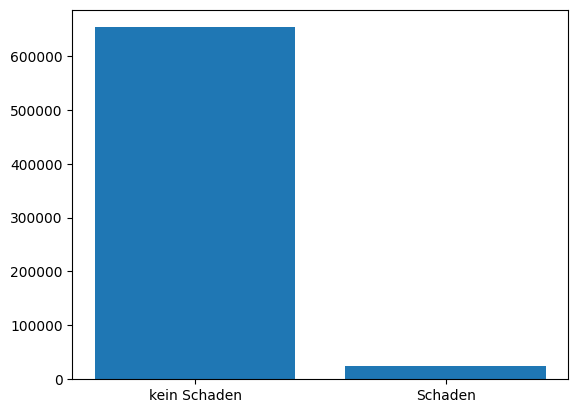

In [18]:
heights = [AnzahlNullN, AnzahlNotNull]
labels = ['kein Schaden', 'Schaden']
plt.bar(labels, heights)

Trenne den Daten-Satz: aufgrund der vielen Nuller:
* binärer Prozess: entweder es gab einen Schadensfall oder nicht (Classifier)
* Wenn es Schadensfälle gab gab, wie hoch waren die Kosten in Bezug auf den Versicherungszeitraum

In [19]:
#Datensatz ohne Null-Werte in ClaimAmount_Exp

df_noNulls = df_cl
df_noNulls = df_noNulls[df_noNulls["ClaimAmount_Exp"] != 0]
df_noNulls.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,ClaimAmount_Exp
count,1.603500e+04,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000
mean,2.412778e+06,1.067103,0.524515,6.525974,7.188525,42.970689,66.899969,2149.712878,2097.110889,8033.173507
std,1.651777e+06,0.321353,0.266756,2.070962,5.279934,14.172792,20.603489,4315.536546,6892.902016,27506.808626
min,1.390000e+02,1.000000,0.002740,4.000000,0.000000,18.000000,50.000000,2.000000,1.090000,2.426667
25%,1.104776e+06,1.000000,0.310000,5.000000,2.000000,32.000000,50.000000,130.000000,787.330000,1323.076923
50%,2.186198e+06,1.000000,0.510000,6.000000,7.000000,43.000000,58.000000,614.000000,1172.000000,2271.618421
75%,3.243262e+06,1.000000,0.750000,7.000000,11.000000,52.000000,80.000000,2620.000000,1509.505000,5054.295032
max,6.113971e+06,16.000000,0.990000,15.000000,69.000000,99.000000,228.000000,27000.000000,307096.420000,500000.000000


## Überprüfung der numerischen  Parameter

### Implementiere  Schadensaufwendungen in Bezug auf Fahrzeugalter

<Axes: xlabel='VehAge', ylabel='ClaimAmount_Exp'>

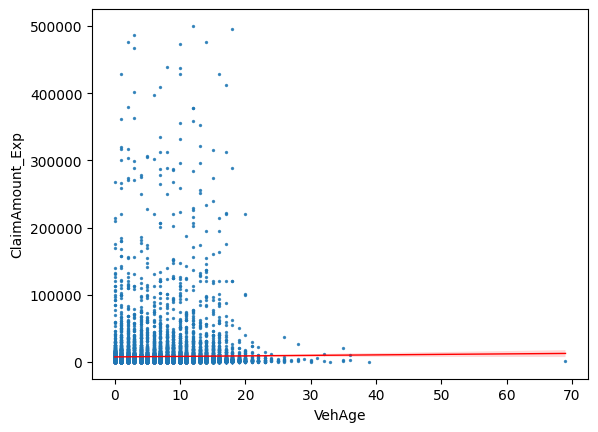

In [20]:
sns.regplot(x="VehAge", y="ClaimAmount_Exp", data=df_noNulls,line_kws={"color": "red",'lw': 1}, scatter_kws={'s':2})

Bias durch sehr alte Fahrzeuge? 

C:\Users\DaniPC\AppData\Local\Temp\ipykernel_20964\2712027810.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cl_ = df_cl_[df_noNulls["ClaimAmount_Exp"] < 40000]


<Axes: xlabel='VehAge', ylabel='ClaimAmount_Exp'>

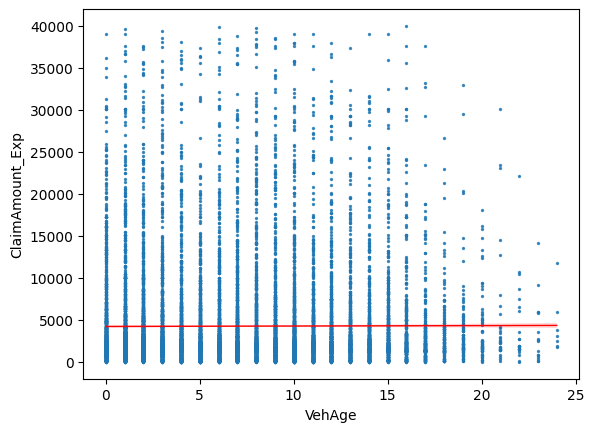

In [21]:
df_cl_ = df_noNulls[df_noNulls["VehAge"] < 25]
df_cl_ = df_cl_[df_noNulls["ClaimAmount_Exp"] < 40000]
sns.regplot(x="VehAge", y="ClaimAmount_Exp", data=df_cl_ ,line_kws={"color": "red",'lw': 1}, scatter_kws={'s':2})

### Schadensaufwendungen in Bezug auf Fahrzeugleistung

<Axes: xlabel='VehPower', ylabel='ClaimAmount_Exp'>

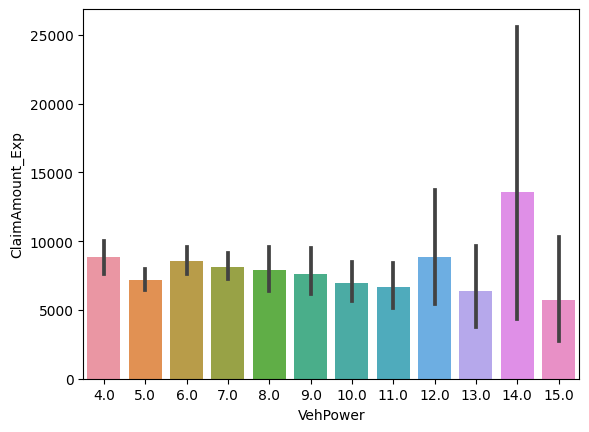

In [22]:
sns.barplot(x="VehPower", y="ClaimAmount_Exp", data=df_noNulls)

Für Feature Selektion: keine Korrelation zwischen Fahrzeugleistung und Schadenskosten erkennbar

### Implementiere einen Regression Plot für Schadensaufwendungen in Bezug auf Alter des Fahrers

<Axes: xlabel='DrivAge', ylabel='ClaimAmount_Exp'>

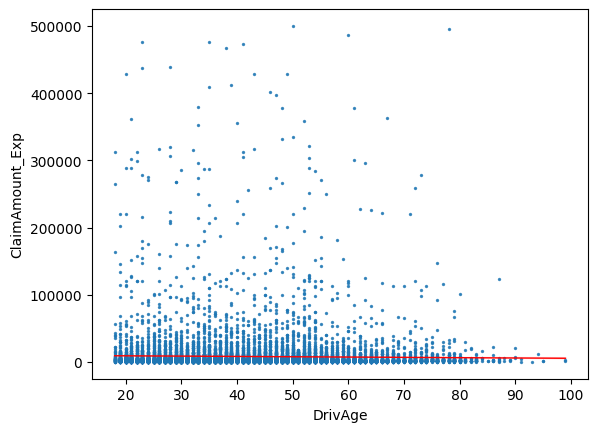

In [23]:
sns.regplot(x="DrivAge", y="ClaimAmount_Exp", data=df_noNulls, line_kws={"color": "red",'lw': 1}, scatter_kws={'s':2})


<Axes: xlabel='DrivAge', ylabel='ClaimAmount_Exp'>

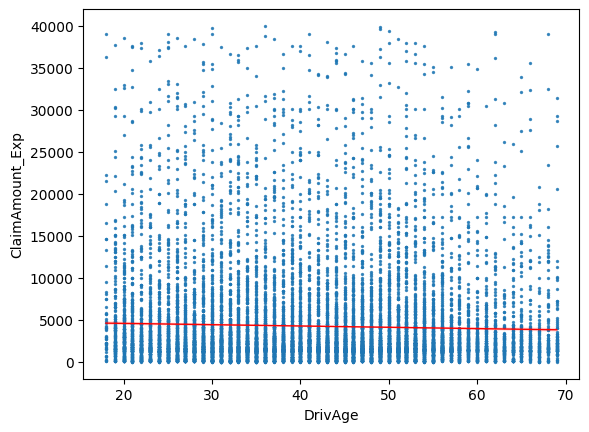

In [24]:
df_cl_ = df_noNulls[df_noNulls["DrivAge"] < 70]
df_cl_ = df_cl_[df_cl_["ClaimAmount_Exp"] < 40000]
sns.regplot(x="DrivAge", y="ClaimAmount_Exp", data=df_cl_, line_kws={"color": "red",'lw': 1}, scatter_kws={'s':2})

### Implementiere einen Regression Plot für Schadensaufwendungen in Bezug auf Einwohnerdichte

<Axes: xlabel='Density', ylabel='ClaimAmount_Exp'>

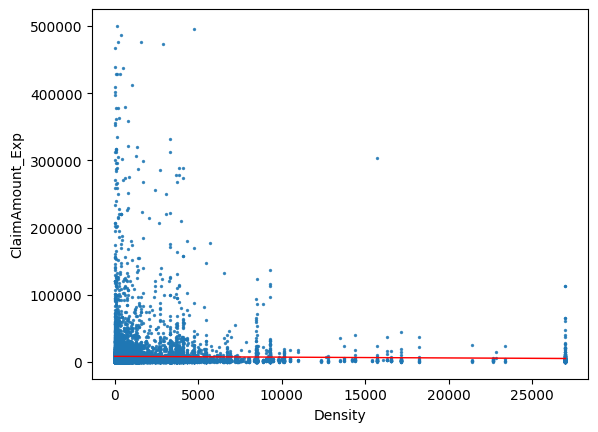

In [25]:
sns.regplot(x="Density", y="ClaimAmount_Exp", data=df_noNulls, line_kws={"color": "red",'lw': 1}, scatter_kws={'s':2})


In [26]:
X = df_noNulls["Density"].values.reshape(-1, 1)
Y = df_noNulls["ClaimAmount_Exp"]

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Y)

y_predicted = poly_reg_model.predict(poly_features)

# Calculate R-squared
r_squared = r2_score(Y, y_predicted)
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.00


### Implementiere einen Regression Plot für Schadensaufwendungen in Bezug auf Schadenfreiheitsklasse

<Axes: xlabel='BonusMalus', ylabel='ClaimAmount_Exp'>

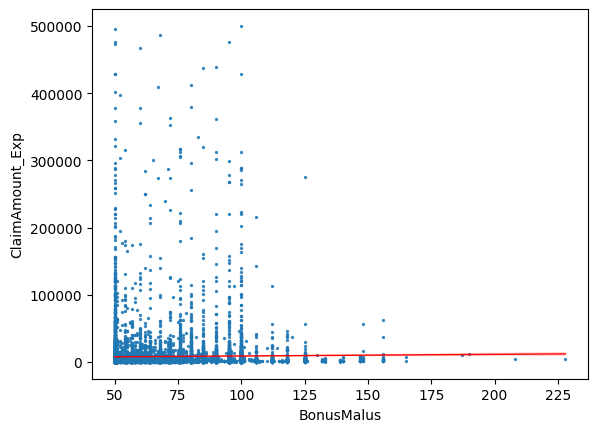

In [27]:
sns.regplot(x="BonusMalus", y="ClaimAmount_Exp", data=df_noNulls, line_kws={"color": "red",'lw': 1}, scatter_kws={'s':2})

<Axes: xlabel='BonusMalus', ylabel='ClaimAmount_Exp'>

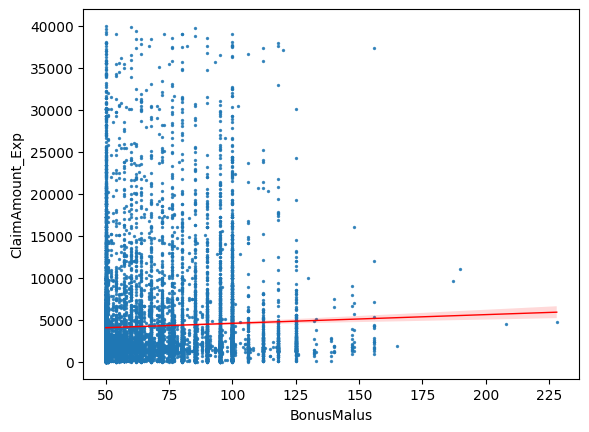

In [28]:
#df_cl_ = df_noNulls[df_noNulls["BonusMalus"] < 70]
df_cl_ = df_cl_[df_cl_["ClaimAmount_Exp"] < 400000]
sns.regplot(x="BonusMalus", y="ClaimAmount_Exp", data=df_cl_, line_kws={"color": "red",'lw': 1}, scatter_kws={'s':2})

# Überprüfung der kategorischen Parameter

<Axes: xlabel='VehGas', ylabel='ClaimAmount_Exp'>

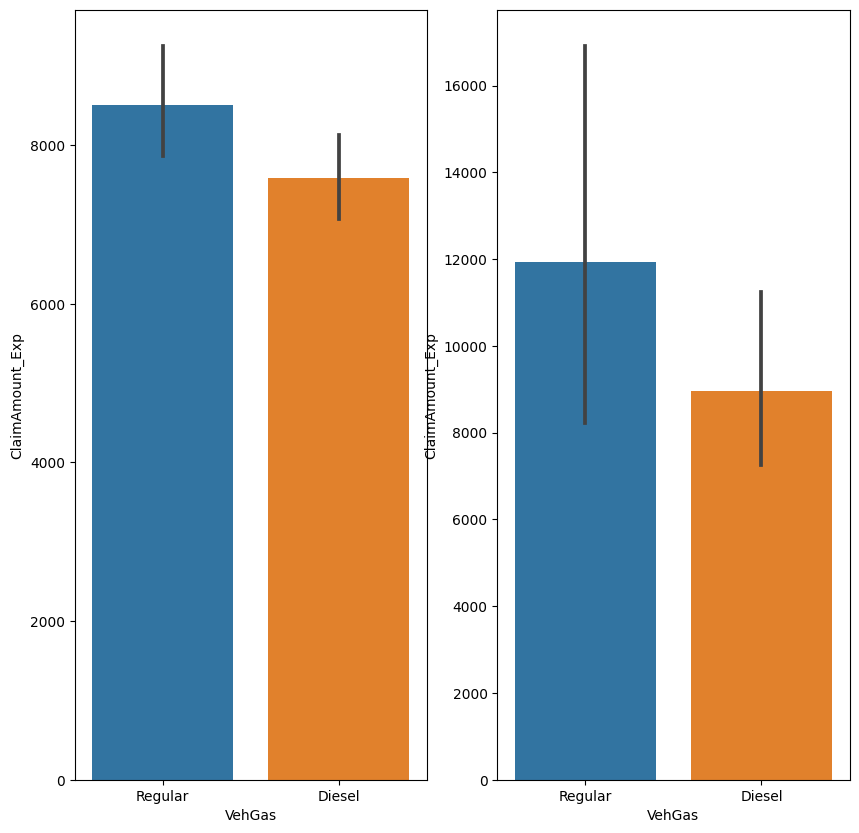

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

sns.barplot(x="VehGas", y="ClaimAmount_Exp", data=df_noNulls, ax=axes[0])
sns.barplot(x="VehGas", y="ClaimAmount_Exp", data=df_freq, ax=axes[1])

In [30]:
Reg = df_noNulls[df_noNulls["VehGas"] == "Regular"]
Dies = df_noNulls[df_noNulls["VehGas"] == "Diesel"]
Reg = Reg["ClaimAmount_Exp"]
Dies = Dies["ClaimAmount_Exp"]
Reg.head()

t_statistic, p_value = stats.ttest_ind(Reg, Dies,equal_var=False)
print(f"T-Statistik: {t_statistic}, P-Wert: {p_value}")

T-Statistik: 2.08589758462735, P-Wert: 0.03700463636434783


<Axes: xlabel='Area', ylabel='ClaimAmount_Exp'>

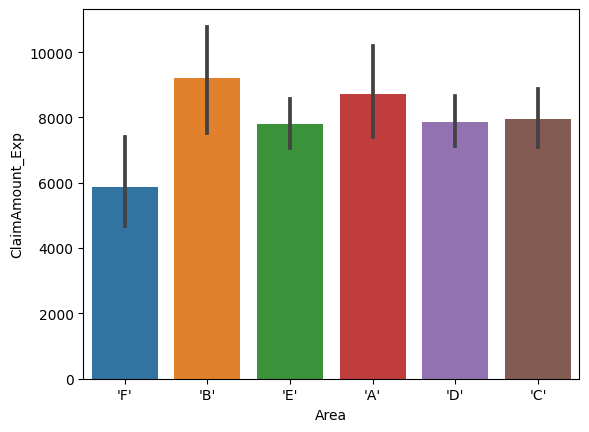

In [31]:
#fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.barplot(x="Area", y="ClaimAmount_Exp", data=df_noNulls)
#sns.barplot(x="Area", y="ClaimAmount_Exp", data=df_freq,ax=axes[1])

<Axes: xlabel='Region', ylabel='ClaimAmount_Exp'>

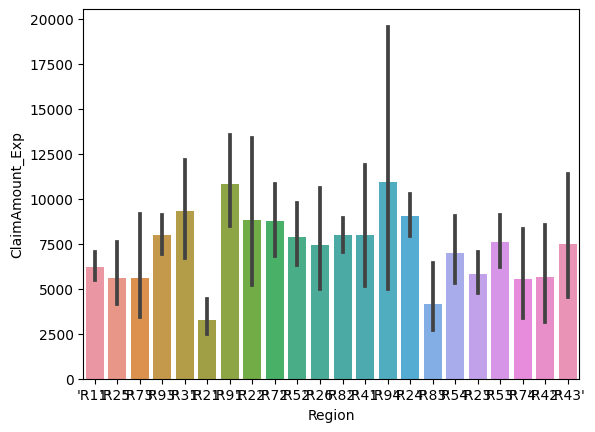

In [32]:
#fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.barplot(x="Region", y="ClaimAmount_Exp", data=df_noNulls)
#sns.barplot(x="Region", y="ClaimAmount_Exp", data=df_cl,ax=axes[1])

<Axes: xlabel='VehBrand', ylabel='ClaimAmount_Exp'>

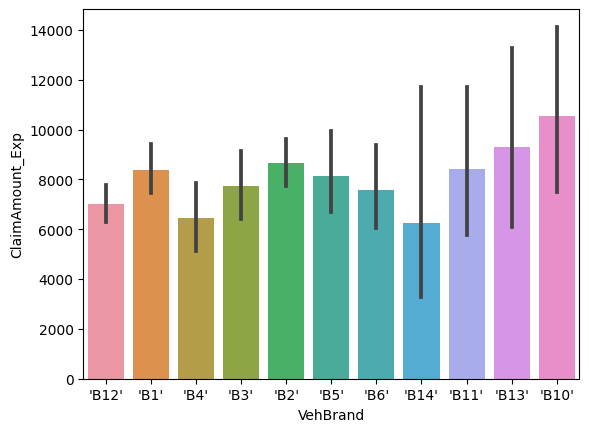

In [33]:
#fig, axes = plt.subplots(1, 2, figsize=(10, 10))
sns.barplot(x="VehBrand", y="ClaimAmount_Exp", data=df_noNulls)
#sns.barplot(x="VehBrand", y="ClaimAmount_Exp", data=df_cl,ax=axes[1])

# Aufgabe 2: Feature Engineering

## Erstellen von Dummy Variablen für Area, VehBrand, Region, VehGas

In [67]:
df_cl.reset_index(drop=True, inplace=True)

In [100]:
#label_encoder = LabelEncoder()
#df_cl['Area_kodiert'] = label_encoder.fit_transform(df_cl['Area'])
dummies = pd.get_dummies(df_cl['Area'], drop_first=True)
dummies = dummies.astype(int)

# Fügen Sie die Dummy-Variablen zum ursprünglichen DataFrame hinzu
df_cl_cat = pd.concat([df_cl, dummies], axis=1)
df_cl_cat.drop('Area', axis=1, inplace=True)
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508609 entries, 0 to 508608
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDpol            508609 non-null  float64
 1   ClaimNb          508609 non-null  float64
 2   Exposure         508609 non-null  float64
 3   Area             508609 non-null  object 
 4   VehPower         508609 non-null  float64
 5   VehAge           508609 non-null  float64
 6   DrivAge          508609 non-null  float64
 7   BonusMalus       508609 non-null  float64
 8   VehBrand         508609 non-null  object 
 9   VehGas           508609 non-null  object 
 10  Density          508609 non-null  float64
 11  Region           508609 non-null  object 
 12  ClaimAmount      508609 non-null  float64
 13  ClaimAmount_Exp  508609 non-null  float64
dtypes: float64(10), object(4)
memory usage: 54.3+ MB


In [101]:
#label_encoder = LabelEncoder()
#df_cl['Gas_kodiert'] = label_encoder.fit_transform(df_cl['VehGas'])
dummies = pd.get_dummies(df_cl['VehGas'], drop_first=True)
dummies = dummies.astype(int)

# Fügen Sie die Dummy-Variablen zum ursprünglichen DataFrame hinzu
df_cl_cat = pd.concat([df_cl_cat, dummies], axis=1)
df_cl_cat.drop('VehGas', axis=1, inplace=True)
df_cl_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508609 entries, 0 to 508608
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDpol            508609 non-null  float64
 1   ClaimNb          508609 non-null  float64
 2   Exposure         508609 non-null  float64
 3   VehPower         508609 non-null  float64
 4   VehAge           508609 non-null  float64
 5   DrivAge          508609 non-null  float64
 6   BonusMalus       508609 non-null  float64
 7   VehBrand         508609 non-null  object 
 8   Density          508609 non-null  float64
 9   Region           508609 non-null  object 
 10  ClaimAmount      508609 non-null  float64
 11  ClaimAmount_Exp  508609 non-null  float64
 12  'B'              508609 non-null  int32  
 13  'C'              508609 non-null  int32  
 14  'D'              508609 non-null  int32  
 15  'E'              508609 non-null  int32  
 16  'F'              508609 non-null  int3

In [102]:
#label_encoder = LabelEncoder()
#df_cl['Brand_kodiert'] = label_encoder.fit_transform(df_cl['VehBrand'])
dummies = pd.get_dummies(df_cl['VehBrand'], drop_first=True)
dummies = dummies.astype(int)

# Fügen Sie die Dummy-Variablen zum ursprünglichen DataFrame hinzu
df_cl_cat = pd.concat([df_cl_cat, dummies], axis=1)
df_cl_cat.drop('VehBrand', axis=1, inplace=True)
df_cl_cat.head()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Region,ClaimAmount,...,'B10','B11','B12','B13','B14','B2','B3','B4','B5','B6'
0,1.0,1.0,0.10,5.0,0.0,55.0,50.0,1217.0,'R82',0.0,...,0,0,1,0,0,0,0,0,0,0
1,3.0,1.0,0.77,5.0,0.0,55.0,50.0,1217.0,'R82',0.0,...,0,0,1,0,0,0,0,0,0,0
2,5.0,1.0,0.75,6.0,2.0,52.0,50.0,54.0,'R22',0.0,...,0,0,1,0,0,0,0,0,0,0
3,10.0,1.0,0.09,7.0,0.0,46.0,50.0,76.0,'R72',0.0,...,0,0,1,0,0,0,0,0,0,0
4,11.0,1.0,0.84,7.0,0.0,46.0,50.0,76.0,'R72',0.0,...,0,0,1,0,0,0,0,0,0,0


In [103]:
#label_encoder = LabelEncoder()
#df_cl_cat['Region_kodiert'] = label_encoder.fit_transform(df_cl['Region'])
dummies = pd.get_dummies(df_cl['Region'], drop_first=True)
dummies = dummies.astype(int)
# Fügen Sie die Dummy-Variablen zum ursprünglichen DataFrame hinzu
df_cl_cat = pd.concat([df_cl_cat, dummies], axis=1)
df_cl_cat.drop('Region', axis=1, inplace=True)
df_cl_cat.head()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,ClaimAmount_Exp,...,'R53','R54','R72','R73','R74','R82','R83','R91','R93','R94'
0,1.0,1.0,0.10,5.0,0.0,55.0,50.0,1217.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,3.0,1.0,0.77,5.0,0.0,55.0,50.0,1217.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,5.0,1.0,0.75,6.0,2.0,52.0,50.0,54.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,10.0,1.0,0.09,7.0,0.0,46.0,50.0,76.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,11.0,1.0,0.84,7.0,0.0,46.0,50.0,76.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
df_cl_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508609 entries, 0 to 508608
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDpol            508609 non-null  float64
 1   ClaimNb          508609 non-null  float64
 2   Exposure         508609 non-null  float64
 3   VehPower         508609 non-null  float64
 4   VehAge           508609 non-null  float64
 5   DrivAge          508609 non-null  float64
 6   BonusMalus       508609 non-null  float64
 7   Density          508609 non-null  float64
 8   ClaimAmount      508609 non-null  float64
 9   ClaimAmount_Exp  508609 non-null  float64
 10  'B'              508609 non-null  int32  
 11  'C'              508609 non-null  int32  
 12  'D'              508609 non-null  int32  
 13  'E'              508609 non-null  int32  
 14  'F'              508609 non-null  int32  
 15  Regular          508609 non-null  int32  
 16  'B10'            508609 non-null  int3

In [105]:
#entferne für die Modellierung nicht relecante Spalten
df_cl_short = df_cl_cat.drop(columns=['ClaimNb', 'Exposure', 'VehPower', 'VehAge'], axis = 1)


In [106]:
df_cl_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508609 entries, 0 to 508608
Data columns (total 43 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDpol            508609 non-null  float64
 1   DrivAge          508609 non-null  float64
 2   BonusMalus       508609 non-null  float64
 3   Density          508609 non-null  float64
 4   ClaimAmount      508609 non-null  float64
 5   ClaimAmount_Exp  508609 non-null  float64
 6   'B'              508609 non-null  int32  
 7   'C'              508609 non-null  int32  
 8   'D'              508609 non-null  int32  
 9   'E'              508609 non-null  int32  
 10  'F'              508609 non-null  int32  
 11  Regular          508609 non-null  int32  
 12  'B10'            508609 non-null  int32  
 13  'B11'            508609 non-null  int32  
 14  'B12'            508609 non-null  int32  
 15  'B13'            508609 non-null  int32  
 16  'B14'            508609 non-null  int3

## Binning der abhängigen Variablen im noNull Datensatz

In [107]:
df_noNulls_cl = df_cl_short
df_noNulls_cl = df_noNulls_cl[df_noNulls_cl["ClaimAmount_Exp"] != 0]

df_noNulls_cl.reset_index(drop=True, inplace=True)
df_noNulls_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IDpol            16035 non-null  float64
 1   DrivAge          16035 non-null  float64
 2   BonusMalus       16035 non-null  float64
 3   Density          16035 non-null  float64
 4   ClaimAmount      16035 non-null  float64
 5   ClaimAmount_Exp  16035 non-null  float64
 6   'B'              16035 non-null  int32  
 7   'C'              16035 non-null  int32  
 8   'D'              16035 non-null  int32  
 9   'E'              16035 non-null  int32  
 10  'F'              16035 non-null  int32  
 11  Regular          16035 non-null  int32  
 12  'B10'            16035 non-null  int32  
 13  'B11'            16035 non-null  int32  
 14  'B12'            16035 non-null  int32  
 15  'B13'            16035 non-null  int32  
 16  'B14'            16035 non-null  int32  
 17  'B2'        

In [108]:
df_noNulls_cl['ClEx_cat'] = pd.qcut(df_noNulls_cl['ClaimAmount_Exp'], q=5, labels=['1', '2', '3', '4', '5'])

C:\Users\DaniPC\AppData\Local\Temp\ipykernel_20964\882731022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noNulls_cl['ClEx_cat'] = pd.qcut(df_noNulls_cl['ClaimAmount_Exp'], q=5, labels=['1', '2', '3', '4', '5'])


In [109]:
df_noNulls_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   IDpol            16035 non-null  float64 
 1   DrivAge          16035 non-null  float64 
 2   BonusMalus       16035 non-null  float64 
 3   Density          16035 non-null  float64 
 4   ClaimAmount      16035 non-null  float64 
 5   ClaimAmount_Exp  16035 non-null  float64 
 6   'B'              16035 non-null  int32   
 7   'C'              16035 non-null  int32   
 8   'D'              16035 non-null  int32   
 9   'E'              16035 non-null  int32   
 10  'F'              16035 non-null  int32   
 11  Regular          16035 non-null  int32   
 12  'B10'            16035 non-null  int32   
 13  'B11'            16035 non-null  int32   
 14  'B12'            16035 non-null  int32   
 15  'B13'            16035 non-null  int32   
 16  'B14'            16035 non-null  int32  

## Datensatz für Logistische Regression: Verwandle numerische Antwortvariable in Binär

In [45]:
#Erstelle Datensatz für die logistic regression
# ersetze Werte durch 1 (Binärer Datensatz)

df_Bin = df_cl_short
for i in range(len(df_Bin)):
    df_Bin['ClaimAmount_Exp'] = np.where(df_Bin['ClaimAmount_Exp'] > 0, 1, 0)   

In [49]:
df_Bin['ClaimAmount_Exp'] = df_Bin['ClaimAmount_Exp'].astype(bool)

In [50]:
df_Bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508609 entries, 0 to 508608
Data columns (total 43 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   IDpol            508609 non-null  float64
 1   DrivAge          508609 non-null  float64
 2   BonusMalus       508609 non-null  float64
 3   Density          508609 non-null  float64
 4   ClaimAmount      508609 non-null  float64
 5   ClaimAmount_Exp  508609 non-null  bool   
 6   'B'              508609 non-null  bool   
 7   'C'              508609 non-null  bool   
 8   'D'              508609 non-null  bool   
 9   'E'              508609 non-null  bool   
 10  'F'              508609 non-null  bool   
 11  Regular          508609 non-null  bool   
 12  'B10'            508609 non-null  bool   
 13  'B11'            508609 non-null  bool   
 14  'B12'            508609 non-null  bool   
 15  'B13'            508609 non-null  bool   
 16  'B14'            508609 non-null  bool

## Standardisieren der Parameter 

### für das logistische Modell

In [52]:
# logistic model
Y_logi = df_Bin['ClaimAmount_Exp']
#nicht relevante und numerische Spalten entfernen
X_logi = df_Bin.drop(columns = ['ClaimAmount_Exp', 'IDpol', 'ClaimAmount','DrivAge', 'BonusMalus', 'Density' ], axis = 1)
#numerische Werte standardisieren
X_Stand = df_Bin[['DrivAge', 'BonusMalus', 'Density']]

sc = MinMaxScaler(feature_range = (0, 1)) 
X_Stand_sc = sc.fit_transform(X_Stand)
X_df = pd.DataFrame(X_Stand_sc, columns=['DrivAge', 'BonusMalus', 'Density'])

X_logi_ = pd.concat([X_logi, X_df], axis=1)

In [ ]:
X_logi_
X_logi_.info()


### für das Regressionsmodell

In [112]:
Y_reg = df_noNulls_cl['ClEx_cat']

X_reg = df_noNulls_cl.drop(columns = ['ClaimAmount_Exp', 'IDpol', 'ClaimAmount','ClEx_cat','DrivAge', 'BonusMalus', 'Density'], axis = 1)
X_reg_st = df_noNulls_cl[['DrivAge', 'BonusMalus', 'Density']]

sc = MinMaxScaler(feature_range = (0, 1)) 
X_reg_st = sc.fit_transform(X_reg_st)
X_df = pd.DataFrame(X_reg_st, columns=['DrivAge', 'BonusMalus', 'Density'])

X_reg_ = pd.concat([X_reg, X_df], axis=1)


In [113]:
X_reg_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   'B'         16035 non-null  int32  
 1   'C'         16035 non-null  int32  
 2   'D'         16035 non-null  int32  
 3   'E'         16035 non-null  int32  
 4   'F'         16035 non-null  int32  
 5   Regular     16035 non-null  int32  
 6   'B10'       16035 non-null  int32  
 7   'B11'       16035 non-null  int32  
 8   'B12'       16035 non-null  int32  
 9   'B13'       16035 non-null  int32  
 10  'B14'       16035 non-null  int32  
 11  'B2'        16035 non-null  int32  
 12  'B3'        16035 non-null  int32  
 13  'B4'        16035 non-null  int32  
 14  'B5'        16035 non-null  int32  
 15  'B6'        16035 non-null  int32  
 16  'R21'       16035 non-null  int32  
 17  'R22'       16035 non-null  int32  
 18  'R23'       16035 non-null  int32  
 19  'R24'       16035 non-nul

# Modell Auswahl

Statistische Modelle, insbesondere lineare Modelle, setzen einen zu einem gewissen Grad voraus, dass die Daten normal 
verteilt sind.<br>
In dem vorliegenden Datensatz verursachen der Überhang an 0ern in der Antwortvariable eine starke Schiefe in der Verteilung.
Derartige Verteilungen sind häufig bei der Analyse zusammengesetzter Variablen wie z. B. Versicherungsansprüchen zu beobachten, bei denen ein großer Teil der Werte Null ist, während der Anteil der Werte, die nicht Null sind, eine eigene Verteilung annimmt. Wenn wir diese Art von Verteilungen in ihre Bestandteile zerlegen, können wir die einzelnen Teile effizienter modellieren und sie später wieder zusammensetzen.


In [55]:
Y_ = df_cl_short['ClaimAmount_Exp']
X_ = df_cl_short.drop(columns = ['ClaimAmount_Exp', 'IDpol', 'ClaimAmount'], axis = 1)

sc = StandardScaler()
X_sc = sc.fit_transform(X_)

In [56]:

lm = LinearRegression()
lm.fit(X_sc,Y_)
print(lm.score(X_sc, Y_))

0.006047317791171181


In [57]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_sc)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Y_)

y_predicted = poly_reg_model.predict(poly_features)

# Calculate R-squared
r_squared = r2_score(Y_, y_predicted)
print(f"R-squared: {r_squared:.2f}")

KeyboardInterrupt: 

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(X_sc)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Y_)
poly.fit(X_sc,Y_)

y_predicted = poly_reg_model.predict(poly_features)

# Calculate R-squared
r_squared = r2_score(Y_, y_predicted)
print(f"R-squared: {r_squared:.2f}")

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
X_sc = X_sc.astype(float)
pipe.fit(X_sc,Y_)
ypipe=pipe.predict(X_sc)
print(r2_score(Y,ypipe))

# Aufgabe 4: Modellbuilding

## Modell 1: Logistic Regression

In [125]:
#Split into test and training set
X_train, X_test, y_train, y_test = train_test_split(X_logi_,Y_logi, test_size=0.5, random_state=42)

# Logistische Regression Modell instanziieren und trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import precision_score
# Vorhersagen auf dem Testset machen
predictions = model.predict(X_test)
precision = precision_score(y_test, predictions, average='binary')
# Leistungsbericht ausgeben
print(classification_report(y_test, predictions))





              precision    recall  f1-score   support

       False       0.97      1.00      0.98    246247
        True       0.00      0.00      0.00      8058

    accuracy                           0.97    254305
   macro avg       0.48      0.50      0.49    254305
weighted avg       0.94      0.97      0.95    254305



C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Anaconda\Lib\site-packages\s

Sehr schlecht bei der Vorhersage von positiven Werten; <br>
Möglicherweise liegt das Problem im unbalanced data set; <br>
Es kommen keine TRUE Werte raus


Ich habe hier das erste Teilmodelle anpassen: es ist ein Ein Klassifikator, der auf allen unseren Daten trainiert und getestet wird.

Im zweiten Teilmodell wird ein Regressor auf echte positive Proben trainiert 

array([False, False, False, ..., False, False, False])

## Modell 2

## Split into Test and Trainingset

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X_reg_, Y_reg, test_size = 0.2, random_state = 42)
print('Training data set length='+str(len(x_train)))
print('Testing data set length='+str(len(x_test)))

Training data set length=12828
Testing data set length=3207


In [115]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
r2_score = lm.score(x_test, y_test)


print(f'Der R^2-Wert des Modells ist: {r2_score}')

Der R^2-Wert des Modells ist: 0.002355862198689773


In [116]:
X_reg_

,'B','C','D','E','F',Regular,'B10','B11','B12','B13',...,'R73','R74','R82','R83','R91','R93','R94',DrivAge,BonusMalus,Density
0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0.530864,0.000000,1.000000
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.395062,0.056180,0.002000
2,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0.222222,0.196629,0.177421
3,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0.407407,0.280899,1.000000
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0.333333,0.000000,0.000370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16030,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0.098765,0.056180,0.011445
16031,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.407407,0.000000,0.006519
16032,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0.209877,0.005618,0.063597
16033,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0.222222,0.000000,0.006630


In [117]:
mod = OrderedModel(y_train,x_train,distr='logit')                                    

res = mod.fit(method='bfgs', start_params=None, maxiter=100, full_output=True, disp=True)

y_pred = res.predict(x_test)


C:\Program Files\Anaconda\Lib\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 1.604003
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102


C:\Program Files\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [122]:
y_pred.head()

,0,1,2,3,4
10284,0.206935,0.203613,0.202686,0.195671,0.191095
10443,0.195274,0.197827,0.202780,0.201550,0.202569
123,0.235737,0.215817,0.200535,0.181352,0.166559
9896,0.206761,0.203530,0.202691,0.195758,0.191259
12701,0.224574,0.211427,0.201658,0.186850,0.175490


In [124]:
y_pred

,0,1,2,3,4
10284,0.206935,0.203613,0.202686,0.195671,0.191095
10443,0.195274,0.197827,0.202780,0.201550,0.202569
123,0.235737,0.215817,0.200535,0.181352,0.166559
9896,0.206761,0.203530,0.202691,0.195758,0.191259
12701,0.224574,0.211427,0.201658,0.186850,0.175490
...,...,...,...,...,...
11378,0.177347,0.187908,0.201838,0.210550,0.222357
9015,0.198701,0.199580,0.202806,0.199821,0.199092
14699,0.192056,0.196139,0.202713,0.203173,0.205919
185,0.253613,0.221997,0.198095,0.172738,0.153557
